## Importar Librerías

In [1]:
import re
import errno
import pandas as pd
!pip install emoji
import emoji
from collections import Counter
from dateutil import parser
import operator
import numpy as np
import matplotlib.ticker as ticker
import matplotlib.cm as cm
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
%matplotlib inline
import io
import sys
from nltk.corpus import stopwords  
from nltk.tokenize import word_tokenize

     |████████████████████████████████| 133kB 11.2MB/s 


In [2]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
#Juan:
!ls "drive/My Drive/Datos_No_Estructurados/Practica1_Whatsapp/"
#Dani
#!ls "drive/My Drive/ColabNotebooks/LOGS/Practica1_Whatsapp"

_chat.txt  en_cw.py  README.md	sp_cw.py
de_cw.py   id_cw.py  sp_cw2.py	whatsapp_analyzer.ipynb


## Lecturas

In [ ]:
!cat "drive/My Drive/ColabNotebooks/LOGS/Practica1_Whatsapp/sp_cw.py"

common_words = ['durante', 'los', 'entre', 'tened', 'estaréis', 'suyo', 'mí', 'serías', 'tuvimos', 'habría', 'estuvieseis', 'hubiese', 'al', 'esas', 'unos', 'tuviese', 'eso', 'fueses', 'pero', 'está', 'soy', 'como', 'fuéramos', 'sintiendo', 'siente', 'estadas', 'tendríais', 'uno', 'habrás', 'habrían', 'fuisteis', 'míos', 'haya', 'estos', 'estarán', 'estoy', 'tuvieran', 'estuviésemos', 'ellos', 'suya', 'nuestro', 'algo', 'tenemos', 'erais', 'estar', 'suyos', 'estás', 'tuyos', 'sí', 'nosotras', 'quien', 'desde', 'tuya', 'de', 'tienes', 'habiendo', 'del', 'sus', 'hubieseis', 'vuestros', 'otros', 'tendré', 'esos', 'serían', 'tendrá', 'estuvieron', 'sobre', 'habéis', 'nuestras', 'otro', 'algunos', 'era', 'estamos', 'eres', 'seríais', 'fuimos', 'tendría', 'hayan', 'habíais', 'ante', 'tenía', 'habrá', 'muchos', 'tuvisteis', 'hayáis', 'tuvieses', 'tuyo', 'me', 'porque', 'hube', 'seas', 'hemos', 'tengas', 'estemos', 'esté', 'habrías', 'ese', 'habidas', 'nos', 'hubiéramos', 'hubiésemos', 'tendrá

In [3]:
#Si ejecuta DANI:
def replace_bad_character(line):
    return line.strip().replace(u"\u202a", "").replace(u"\u200e", "").replace(u"\u202c", "").replace(u"\xa0", " ")

# Para escribir la ubicacion del chat
try: 
    filepath = raw_input("Please input the chat filepath:")
except NameError:
    filepath = input("Please input chat filepath:")
# Lee el char ¡¡t (txt), se almacena todo en la variable content
try:
    with io.open("drive/My Drive/ColabNotebooks/LOGS/Practica1_Whatsapp/" + filepath, "r", encoding="utf-8") as file:
        content = [replace_bad_character(l) for l in file.readlines()]
    
except IOError as e:
    print("File \"" + "drive/My Drive/ColabNotebooks/LOGS/Practica1_Whatsapp/" + filepath + "\" not found. Please recheck your file location")
    sys.exit()

common_words = []
cw_filepath = ""

cw_option = "Please select common word file or leave it blank to escape: \n\
    1: Indonesian (id_cw.py)\n\
    2: English (en_cw.py)\n\
    3: Spanish file\n\
    4: Skip common word\n"                   
try: 
    cw = raw_input(cw_option)
except NameError:
    cw = input(cw_option)
    
if cw == "1":
    cw_filepath = "id_cw"
elif cw == "2":
    cw_filepath = "en_cw"
elif cw == "3":
    cw_filepath = "sp_cw2.py"
elif cw == "4":
    # Prompt user to input the file path
    try: 
        cw_filepath = raw_input("Please input your common word filepath")
    except NameError:
        cw_filepath = input("Please input your common word filepath")

if len(cw_filepath) > 0:
    try:
        print("CW")
        
        print("drive/My Drive/ColabNotebooks/LOGS/Practica1_Whatsapp/" + cw_filepath)

        with open("drive/My Drive/ColabNotebooks/LOGS/Practica1_Whatsapp/" + cw_filepath) as file:
          for line in file:
            #El string lo paso a lista
            x= line.split(",")
            #Y cada elemento de la lista lo trato por separado
            for item in x:
              #Me interesa la palabra, las comillas me sobran
              y=item.split("'")[1]      
              common_words.append(y)

        print(common_words[0])
        print(common_words)
         #common_words = __import__("drive/My Drive/ColabNotebooks/LOGS/Practica1_Whatsapp/" + cw_filepath, globals(), locals(), [common_words]).common_words
    except:
        print("Error getting common word file location")
        sys.exit()
else:
    print("You skipped common word.")

try: 
    verbose = raw_input("You wanna print the verbose mode? y/[N]: ") == "y" or False
except NameError:
    verbose = input("You wanna print the verbose mode? y/[N]: ") == "y" or False


Please input chat filepath:_chat.txt
Please select common word file or leave it blank to escape: 
    1: Indonesian (id_cw.py)
    2: English (en_cw.py)
    3: Spanish file
    4: Skip common word
3
CW
drive/My Drive/ColabNotebooks/LOGS/Practica1_Whatsapp/sp_cw2.py
durante
['durante', 'los', 'entre', 'tened', 'estaréis', 'suyo', 'mí', 'serías', 'tuvimos', 'habría', 'estuvieseis', 'hubiese', 'al', 'esas', 'unos', 'tuviese', 'eso', 'fueses', 'pero', 'está', 'soy', 'como', 'fuéramos', 'sintiendo', 'siente', 'estadas', 'tendríais', 'uno', 'habrás', 'habrían', 'fuisteis', 'míos', 'haya', 'estos', 'estarán', 'estoy', 'tuvieran', 'estuviésemos', 'ellos', 'suya', 'nuestro', 'algo', 'tenemos', 'erais', 'estar', 'suyos', 'estás', 'tuyos', 'sí', 'nosotras', 'quien', 'desde', 'tuya', 'de', 'tienes', 'habiendo', 'del', 'sus', 'hubieseis', 'vuestros', 'otros', 'tendré', 'esos', 'serían', 'tendrá', 'estuvieron', 'sobre', 'habéis', 'nuestras', 'otro', 'algunos', 'era', 'estamos', 'eres', 'seríais', 'f

In [ ]:
#SI ejecuta JUAN:
def replace_bad_character(line):
    return line.strip().replace(u"\u202a", "").replace(u"\u200e", "").replace(u"\u202c", "").replace(u"\xa0", " ")

# Para escribir la ubicacion del chat
try: 
    filepath = raw_input("Please input the chat filepath:")
except NameError:
    filepath = input("Please input chat filepath:")
# Lee el char ¡¡t (txt), se almacena todo en la variable content
try:
    with io.open("drive/My Drive/Datos_No_Estructurados/Practica1_Whatsapp/" + filepath, "r", encoding="utf-8") as file:
        content = [replace_bad_character(l) for l in file.readlines()]
    
except IOError as e:
    print("File \"" + "drive/My Drive/Datos_No_Estructurados/Practica1_Whatsapp/" + filepath + "\" not found. Please recheck your file location")
    sys.exit()

common_words = []
cw_filepath = ""

cw_option = "Please select common word file or leave it blank to escape: \n\
    1: Indonesian (id_cw.py)\n\
    2: English (en_cw.py)\n\
    3: Spanish file\n\
    4: Skip common word\n"                   
try: 
    cw = raw_input(cw_option)
except NameError:
    cw = input(cw_option)
    
if cw == "1":
    cw_filepath = "id_cw"
elif cw == "2":
    cw_filepath = "en_cw"
elif cw == "3":
    cw_filepath = "sp_cw2.py"
elif cw == "4":
    # Prompt user to input the file path
    try: 
        cw_filepath = raw_input("Please input your common word filepath")
    except NameError:
        cw_filepath = input("Please input your common word filepath")

if len(cw_filepath) > 0:
    try:
        print("CW")
        with open("drive/My Drive/Datos_No_Estructurados/Practica1_Whatsapp/" + cw_filepath) as file:
          for line in file:
            #El string lo paso a lista
            x= line.split(",")
            #Y cada elemento de la lista lo trato por separado
            for item in x:
              #Me interesa la palabra, las comillas me sobran
              y=item.split("'")[1]      
              common_words.append(y)

        print(common_words[0])
        print(common_words)
        # common_words = __import__("drive/My Drive/Datos_No_Estructurados/Practica1_Whatsapp/" + cw_filepath, globals(), locals(), [common_words]).common_words
    except:
        print("Error getting common word file location")
        sys.exit()
else:
    print("You skipped common word.")

try: 
    verbose = raw_input("You wanna print the verbose mode? y/[N]: ") == "y" or False
except NameError:
    verbose = input("You wanna print the verbose mode? y/[N]: ") == "y" or False


Please input chat filepath:_chat.txt
Please select common word file or leave it blank to escape: 
    1: Indonesian (id_cw.py)
    2: English (en_cw.py)
    3: Spanish file
    4: Skip common word
3
CW
durante
['durante', 'los', 'entre', 'tened', 'estaréis', 'suyo', 'mí', 'serías', 'tuvimos', 'habría', 'estuvieseis', 'hubiese', 'al', 'esas', 'unos', 'tuviese', 'eso', 'fueses', 'pero', 'está', 'soy', 'como', 'fuéramos', 'sintiendo', 'siente', 'estadas', 'tendríais', 'uno', 'habrás', 'habrían', 'fuisteis', 'míos', 'haya', 'estos', 'estarán', 'estoy', 'tuvieran', 'estuviésemos', 'ellos', 'suya', 'nuestro', 'algo', 'tenemos', 'erais', 'estar', 'suyos', 'estás', 'tuyos', 'sí', 'nosotras', 'quien', 'desde', 'tuya', 'de', 'tienes', 'habiendo', 'del', 'sus', 'hubieseis', 'vuestros', 'otros', 'tendré', 'esos', 'serían', 'tendrá', 'estuvieron', 'sobre', 'habéis', 'nuestras', 'otro', 'algunos', 'era', 'estamos', 'eres', 'seríais', 'fuimos', 'tendría', 'hayan', 'habíais', 'ante', 'tenía', 'habrá',

In [17]:
class bcolors:
    HEADER = '\033[95m'
    OKBLUE = '\033[94m'
    OKGREEN = '\033[92m'
    WARNING = '\033[93m'
    FAIL = '\033[91m'
    ENDC = '\033[0m'
    BOLD = '\033[1m'
    UNDERLINE = '\033[4m'

In [18]:
# Variables globales
chat_of_members = {}
member_chat = {"member": [], "chat_count": []}
attachments = {}
refered_web = {"domain": [], "d_count": []}
popular_words = {}
chat_words = ""
popular_Latewords = {}
chat_Latewords = ""
emojis = {"emj_char": [], "char_count": []}
heat_map = {
    "day": [], 
    "hour": [], 
    "chat_count": []
}
deleted_message = 0
pure_chat = ""
total_chat = 0


# Starting line mean a line that started with date time.
# Because there are multiline chat. I called it following line.
# A starting line must be classified before it's data being extracted.

#Funcion para detectar nueva línea en base a un patrón
def is_starting_line(line):
    pattern = r"""
        (\[?)       #Zero or one open square bracket '['
        (((\d{1,2})   #1 to 2 digit date
        (/|-)       #'/' or '-' separator
        (\d{1,2})   #1 to 2 digit month
        (/|-)       #'/' or '-' separator
        (\d{2,4}))   #2 to 4 digit of year
        (,?\s)      #Zero or one comma ',' and ingle space
        ((\d{1,2})  #1 to 2 digit of hour
        (:|\.)      #Colon ':' or dot '.' separator
        (\d{2})     #2 digit of minute
        (\.|:)?     #Zero or one of dot '.' or colon ':'
        (\d{2})?    #Zero or one of 2 digits of second
        (\s[AP]M)?))  #Zero or one of ('space', 'A' or 'P', and 'M'
        (\]?\s-?\s?\s?)#Zero or one close square bracket ']', Zero or one (space and '-'), zero or one space
        (.+)        #One or more character of chat member phone number or contact name
    """
    
    return re.match(re.compile(pattern, re.VERBOSE), line)


# "Is Chat" means the body of a line is not an event. May contains attachment

def is_chat(body):
    pattern = r"""
            ([^:]+)#Chat member
            (:)   #Colon separator
            (.+)  #One or more charachter of message content
    """
    
    return re.match(re.compile(pattern, re.VERBOSE), body)


# Classify attachment Note: in Android, there is no proper description wether it's a image, video, audio, gif, or sticker.
## ¿No habría que poner esto con su correspondiente en español? "audio omitido", "Video omitido"
#Cambiado.
def contains_attachment(body):
    pattern_attachment = [
        ".*<Media omitted>$", #English version of android attachment
        ".*<Media tidak disertakan>$", #Indonesia version of android attachment
        ".*Pesan tidak didukung$", #Some device not recognize sticker attachment
        ".+\.vcf \(file\sterlampir\)$", #Indonesian version of android contact card,
        ".+\.vcf \(file\sattached\)$", #Indonesian version of android contact card,
        ".*imagen omitida$",
        ".*Video omitido$",
        ".*documento omitido$",
        ".*Tarjeta de contacto omitida$",
        ".*audio omitido$",
        ".*GIF omitido$",
        ".*sticker omitido$"
    ]

    
    
    for p in pattern_attachment:
        match = re.match(p, body)
        if match:
            return body
    return None


# Event means logs of chat activity e.g member left, member added, removed, etc.
# This kind of line can not count as a chat
#Idem. Supongo que esto habría que ponerlo en castellano pero sudamos porque en verdad dudo que en tu grupo se haya añadido mucha gente.
#Realmente no da jugo este método
def is_event(body):
    pattern_event = [
        "Messages to this group are now secured with end-to-end encryption\.$",
        ".+\screated this group$",
        ".+\skeluar$",
        ".+\sleft$",
        ".+\stelah bergabung menggunakan tautan undangan grup ini$",
        ".+\smenambahkan\s.+",
        ".+\sadded\s.+",
        ".+\sremoved\s.+",
        ".*You joined using this group's invite links$",
        ".+'s security code changed\.$",
        ".*telah mengganti nomor teleponnya ke nomor baru. Ketuk untuk mengirim pesan atau menambahkan nomor baru\.$",
        ".*changed their phone number to a new number. Tap to message or add the new number\.$"
    ]
    
    for p in pattern_event:
        match = re.match(p, body)
        if match:
            return match
    return None

# Deleted message
#En tu grupo no hay mensajes eliminados, al menos si haces control+F para buscar algo similar, no sale. Hemos ganado.
def is_deleted(body):
    p = [
        ".*This message was deleted\.$",
        ".*Pesan ini telah dihapus$"
    ]
    
    for p in p:
        match = re.match(p, body)
        if match:
            return body
    return None


# EXTRACT TIMESTAMP
def extract_timestamp(time_string):
    return parser.parse(time_string)


# Check if chat contais a url
def extract_url(body):
    pattern = "https?://(?:[-\w.]|(?:%[\da-fA-F]{2}))+"
    
    return re.findall(pattern, body)

def get_domain(str):
    domain = str.replace("http://", '')
    domain = domain.replace("https://", '')
    domain = domain.split("/")
    return domain[0]


# EMOJI
def extract_emojis(string):
    
    
    emj = []
    for c in string:
        if c in emoji.UNICODE_EMOJI:
            emj.append(c)

    if len(emj) > 0:
        increment_emoji_count(emj)
    
    return emj


# Count top words
def get_words(msg):
    
    #remove non alpha content
    #Se pasa todo a minusculas y splitea palabras
    regex = re.sub(r"[^a-z\s]+", "", msg.lower())
    regex = re.sub(r'[^\x00-\x7f]',r'', regex)
    words = regex.split(" ")
    
    for x in words:
        if x:
            rank_word(x)
            
    return words

def rank_word(word):
    if not word in common_words:
        popular_words[word] = popular_words.get(word, 0) + 1
        global chat_words
        chat_words += " {0}".format(word)
        
    return word


    
##### Realmente con la función que me he hecho, esto queda Deprecated. Ya lo incluyo    
# Rank the 'Most Active user'    
def increment_chat_count(member):
    member_chat["member"].append(member)
    member_chat["chat_count"].append(1)
    global total_chat
    total_chat += 1
    
    return member
 
#Imaigno que aquí tendremos que toquetear porque 'image' o 'document' está en inglés
def increment_attachment_count(message):

    if "imagen omitida" in message:
        attachments["image"] = attachments.get("image", 0) +1
        return
        
    if "Video omitido" in message:
        attachments["video"] = attachments.get("video", 0) +1
        return
    
    if "audio omitido" in message:
        attachments["audio"] = attachments.get("audio", 0) +1
        return
    
    if "documento omitido" in message:
        attachments["document"] = attachments.get("document", 0) +1
        return
    
    if "Tarjeta de contacto omitida" in message or ".vcf" in message:
        attachments["contact"] = attachments.get("contact", 0) +1
        return
    
    if "GIF omitido" in message:
        attachments["gif"] = attachments.get("gif", 0) +1
        return
    
    if "sticker omitido" in message:
        attachments["sticker"] = attachments.get("sticker", 0) +1
        return
    
    ##Unknown attachment
    attachments["unknown"] = attachments.get("unknown", 0) +1

    

def increment_link_count(urls):
    for url in urls:
        increment_domain_count(get_domain(url))
                    
    return len(urls)
    
def increment_domain_count(domain):
    refered_web["domain"].append(domain)
    refered_web["d_count"].append(1)

def increment_emoji_count(char_list):
    
    groups = Counter(char_list)
    for c in groups.items():
        emojis["emj_char"].append(c[0])
        emojis["char_count"].append(c[1])
        
#Mapa de calor de tiempo que va incrementando cada vez que se lee un mensaje a determinada hora
def increment_heatmap(dt):
    heat_map["day"].append(dt.strftime("%A"))
    heat_map["hour"].append(dt.strftime("%H"))
    heat_map["chat_count"].append(1)

def increment_deleted():
    global deleted_message
    deleted_message += 1

In [19]:
########## Me la he hecho yo: Guardar toda la info de un usuario: número de veces que escribe en el chat, núm de caracteres,
########## qué día, mes, año y hora
member_chat_info = {"member": [],  "chat_count": [],"chars_count": [], "dia": [],"mes": [], "anio": [], "hora": []}

def num_chars(linea_chat):
  dia = int(linea_chat.group(4))
  mes = int(linea_chat.group(6))
  anio = int(linea_chat.group(8))

  hora = int(linea_chat.group(11))
  
  chat = is_chat(linea_chat.group(18))

  member = chat.group(1)
  chars_written = len(chat.group(3))
  
  ###Hacemos la misma función de increment_chat_count
  member_chat_info["chat_count"].append(1)
  ###Ahora el resto de extras
  member_chat_info["member"].append(member)
  member_chat_info["chars_count"].append(chars_written)
  member_chat_info["dia"].append(dia)
  member_chat_info["mes"].append(mes)
  member_chat_info["anio"].append(anio)
  member_chat_info["hora"].append(hora)
    

In [20]:
####### Me la he hecho yo: para hacer un worldCloud de esos pero solo con palabras que se hayan usado desde las 23h a las 7 h kjaskajksakj
# Count top words
def get_Latewords(msg):
    
    #remove non alpha content
    #Se pasa todo a minusculas y splitea palabras
    regex = re.sub(r"[^a-z\s]+", "", msg.lower())
    regex = re.sub(r'[^\x00-\x7f]',r'', regex)
    words = regex.split(" ")
    
    for x in words:
        if x:
            rank_Lateword(x)
            
    return words


def rank_Lateword(word):
    if not word in common_words:
        popular_Latewords[word] = popular_Latewords.get(word, 0) + 1
        
        global chat_Latewords
        chat_Latewords += " {0}".format(word)
        
    return word

In [21]:
########### EXTRA MÍO AÑADIDO - para contar quién es el que más attachments envía (video, auido, imagen, documentos...)
member_attachment_info = {"member": [],  "attachment_count": []}


member_attachment_info_detailed= pd.DataFrame({ 
    'imagenomitida': [],
    'Videoomitido': [],
    'audioomitido': [],
    'Tarjetadecontactoomitida': [],
    'GIFomitido': [],
    'stickeromitido':[],
    'unknown':[]},
    index=[]
)




def increment_users_attachment_count(message, member):
  global member_attachment_info_detailed
  message =  message.replace(' ', '')
  if 'documento' not in message:
    if member in member_attachment_info_detailed.index:
      
      old_value= member_attachment_info_detailed.loc[member,message]
      
      #Incrementamos el conteo
      
      member_attachment_info_detailed.loc[member,message] = old_value+1
    else:
      
      
      aux = pd.DataFrame({
      'imagenomitida': [0],
      'Videoomitido': [0],
      'audioomitido': [0],
      'Tarjetadecontactoomitida': [0],
      'GIFomitido': [0],
      'stickeromitido':[0],
      'unknown':[0]},
      index=[member]
      )
      
      #Incrementamos el conteo
      aux[message]=1
      #Añadimos al user
      struct=member_attachment_info_detailed.append(aux)
      
      member_attachment_info_detailed=struct

    

#indx= mi_df.index
#'Valladolid' in indx
#df1 = pd.Index([17, 69, 33, 5, 0, 74, 0]) 
#indx.append(df1)



    

In [22]:
# Self explained
def parse_line(line, verbose):
    prefix = ""
    # se comporueba el inicio del mensaje y nos quedamos con las parte del mensaje
    is_starting = is_starting_line(line)
    
    # si es asi se ejecuta
    if is_starting:
###### Eran prints para entender de qué info disponemos. 
### RESUMEN:
# is_starting.group(3) = día/mes/año 
# is_starting.group(4) = día 
# is_starting.group(6) = mes
# is_starting.group(8) = año
# is_starting.group(10) = hora:min:secs
# is_starting.group(11) = hora
# is_starting.group(13) = min
# is_starting.group(15) = secs
# is_starting.group(18) = nombre_usuario : mensaje = {variable 'chat'}


#        print("is_starting: Group no")
#        print(is_starting)
#        for i in range(19):
#          print("is_starting: Group: %d ", i)
#          print(is_starting.group(i))
        

        # Check wether the starting line is a chat or an event
        # se queda con el nombre y el mensaje 
        body = is_starting.group(18)
        # es un chat?
        chat = is_chat(body)
        
        # se transforma la parte de la fecha a legible
        dt = extract_timestamp(is_starting.group(2).replace(".", ":"))
        # actualizamos
        increment_heatmap(dt)
        
        if chat:
####### Eran prints para entender de qué info disponemos. 
### RESUMEN:
# chat.group(1) = nombre_usuario
# chat.group(3) = mensaje


#            print("Es chat")
#            print(chat)            
#            for i in range(4):
#              print("Chat: %d ", i)
#              print(chat.group(i))
            

            # comprueba si tiene algun archivo
            has_attachment = contains_attachment(chat.group(3))
            # le pasamos el nombre del que ha enviado el mensaje
            
            increment_chat_count(chat.group(1))
            # se queda con el mensaje
            message_body = chat.group(3)

            ######## EXTRA AÑADIDO - por mi. Guardar el num de characters que escribe un user y la fecha (día, mes, año) y hora en la que fue escrito (sudando de los minutos)
            num_chars(is_starting)
            ########
            
            
            # si tiene algun archivo/attachment (audio,video, foto, gif...), actualizo
            if has_attachment:
                prefix = "@@@" 
                increment_attachment_count(has_attachment)


                ########## EXTRA AÑADIDO - LE SUMO AL USUARIO +1 EN ENVÍO DE ATTACHMENTS
                member_attachment_info["attachment_count"].append(1)
                member_attachment_info["member"].append(chat.group(1))

                ###La otra parte es separar qué envía cada user
                increment_users_attachment_count(has_attachment, chat.group(1))
                ############
                
                
                if verbose: print(bcolors.OKBLUE + bcolors.HEADER + prefix + line)
            #en caso de que no sea un archivo
            else:
                # si se ha borrado, actualizamos
                if is_deleted(message_body):
                    increment_deleted()
                # caso de un mensaje normal
                else:
                    prefix = "+++"
                    
                    # URL & Domain
                    urls = extract_url(message_body)
                    if urls:
                        increment_link_count(urls)

                    # Emoji
# Coger los emojis no funciona porque no los interpreta cuando los lee el programa. Literal que debería transfomar el emoji a un UNICODE, pero no lo hace
# Por lo que si no los interpreta, no podemos incluir ese analisis
                    emjs = extract_emojis(message_body)
                    
                    # Word Count & Wordcloud
                    get_words(message_body)
                
                    ########## EXTRA AÑADIDO - Para hacer el word Cloud con palabras utilizadas por la noche xd
                    if (int(is_starting.group(11)) >= 23 or int(is_starting.group(11)) <= 7):
                      
                      get_Latewords(message_body)
                    ############
                    if verbose: print(bcolors.OKGREEN + bcolors.HEADER + prefix + line)
        # Eventos como añadir, eliminar    
        elif is_event(body):
            prefix = "***"
                
            if verbose: print(bcolors.WARNING + prefix + line)
        
    # Otros casos rarunos: si no es un chat es que han metido a alguien o lo que sea, entiendo.
    else:
        prefix = "|||"
        
        #URL & Domain
        urls = extract_url(line)
        if urls:
            increment_link_count(urls)
        
        #Emoji    
        emjs = extract_emojis(line)
        
        #Word Count & Wordcloud
        get_words(line)

        if verbose: print(bcolors.FAIL + prefix + line)

In [23]:
for line in content:
    parse_line(line, verbose)
    

In [64]:
########### SI UTILIZAR ESTO PARA HACER UN PLOT DPM

member_attachment_info_detailed
#### COSAS QUE MOLARÍA PLOTEAR:
# ¿Quien es el más trasnochador? -> con la estructura que me he creado de 'member_chat_info' -> HECHO
# ¿En qué epoca del año se escribe más? (Mes, etc) -> con la estructura de 'member chat info' -> PENDIENTE
# ¿Quién es el que más spamea audios? ¿Y videos, fotos? -> con la estructura de 'member_attachment_info' -> HECHO -> Podrías 
    # intentar ver que la función que identifica attachments devuelva el tipo de attachment, de este modo podríamos añadir a la estructura 
    # esta esa info para poder hacer un plot más guapo y saber qué movidas envía cada uno
# ¿Quién es el que más caracteres escribe? ¿Es la misma persona que la que  más mensajes manda?  -> CASI HECHO -> ¿Sabes poner 2 labels? Soy incapaz




,imagenomitida,Videoomitido,audioomitido,Tarjetadecontactoomitida,GIFomitido,stickeromitido,unknown
Jaime,123.0,47.0,22.0,2.0,10.0,112.0,0.0
Pablo,326.0,53.0,70.0,1.0,30.0,320.0,0.0
+44 7557 990707,46.0,5.0,11.0,0.0,0.0,0.0,0.0
David R.,195.0,80.0,31.0,0.0,9.0,262.0,0.0
Juan,161.0,21.0,17.0,0.0,1.0,40.0,0.0
+44 7429 470228,67.0,3.0,3.0,0.0,0.0,438.0,0.0
Carlos Dot,7.0,0.0,6.0,0.0,1.0,35.0,0.0


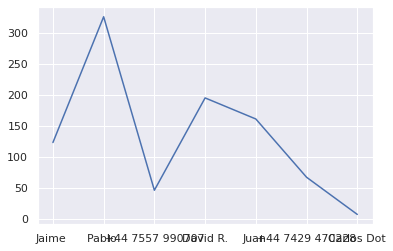

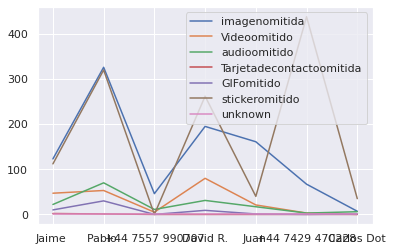

In [63]:
member_attachment_info_detailed['imagenomitida'].plot()
member_attachment_info_detailed.plot()

                    chat_count  chars_count
member                                     
Pablo                     5677       127795
David R.                  4439        88644
Juan                      4177        95330
Jaime                     3311        61502
+44 7429 470228           2423        55279
+44 7557 990707           1531        35779
Carlos Dot                 456        11406
Pornosotros!!!           1          143


/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 58645 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 58647 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 57345 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 57348 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 58645 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 58647 missing from current font.
  font.set_te

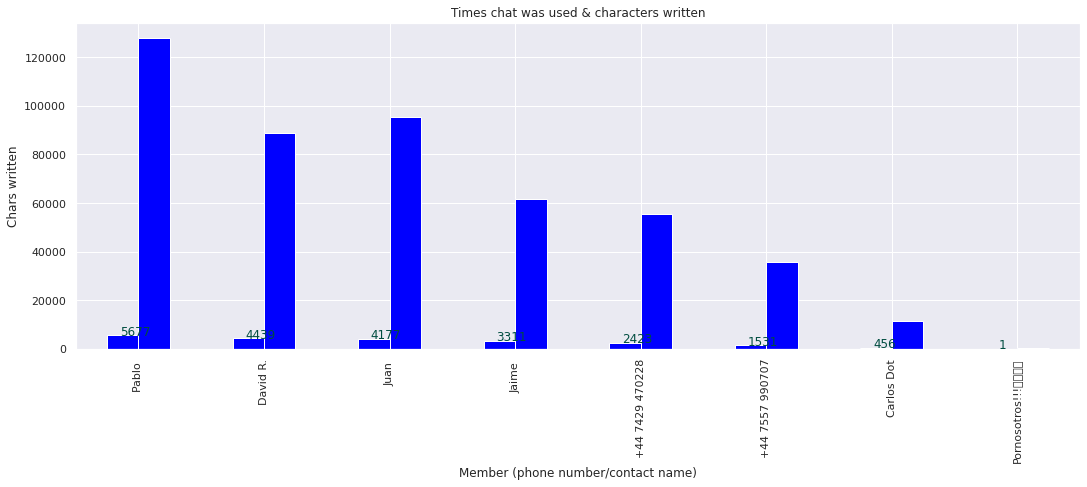

In [25]:
######### Hecha por mi.
##### Mostramos la siguiente info de los usuarios: cuántos caracteres han escrito y cuantas veces han escrito en el chat
######### ¿SABES PONER 2 LABELS? soy incapaz
"""
DataFrame de carateres por pibe y de número de veces que escriben en el chat
"""
info_member = (pd.DataFrame(member_chat_info)
                     .groupby(["member"])
                     .sum()
                     .sort_values(by = ['chat_count'], ascending=False))

"""
Top Member Chars written
"""
print(info_member.head(10)[["chat_count","chars_count"]])
top_users = info_member.head(10)[["chat_count","chars_count"]]
if not top_users.empty:
    sns.set()
    member_plot = top_users.plot(kind='bar', legend=None, title="Times chat was used & characters written", figsize=(18, 6), color="blue")
    member_plot.set_xlabel("Member (phone number/contact name)")
    member_plot.set_ylabel("Chars written")
    
    for i, v in enumerate(top_users["chat_count"]):
        member_plot.text(i - .15, v + 3, v, color="#004d40")
    
else:
    print("This chat has no member")


####### ANÁLISIS
##### Se ve claramente que hay usuarios que escribiendo casi el mismo número de veces (Juan y David), 
##### el primero escribe más caracteres que el segundo
### Luego se puede apreciar que Jaime parece que únicamente pone mensajes cortos frente la resto.

                    chat_count  chars_count
member                                     
Pablo                     5677       127795
David R.                  4439        88644
Juan                      4177        95330
Jaime                     3311        61502
+44 7429 470228           2423        55279
+44 7557 990707           1531        35779
Carlos Dot                 456        11406
Pornosotros!!!           1          143


/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 58645 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 58647 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 57345 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 57348 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 58645 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 58647 missing from current font.
  font.set_te

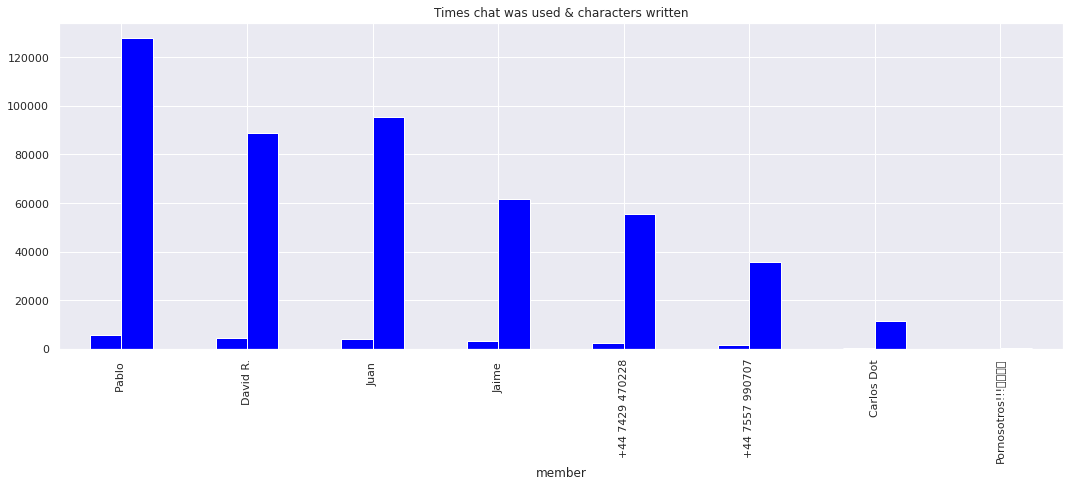

In [ ]:
######### Hecha por mi.
##### Mostramos la siguiente info de los usuarios: cuántos caracteres han escrito y cuantas veces han escrito en el chat
######### ¿SABES PONER 2 LABELS? soy incapaz
"""
DataFrame de carateres por pibe y de número de veces que escriben en el chat
"""
info_member = (pd.DataFrame(member_chat_info)
                     .groupby(["member"])
                     .sum()
                     .sort_values(by = ['chat_count'], ascending=False))

"""
Top Member Chars written
"""
print(info_member.head(10)[["chat_count","chars_count"]])
top_users = info_member.head(10)[["chat_count","chars_count"]]
if not top_users.empty:
    #sns.set()
    member_plot = top_users.plot(kind='bar', legend=None, title="Times chat was used & characters written", figsize=(18, 6), color="blue")
    #member_plot.set_xlabel("Member (phone number/contact name)")
    #member_plot.set_ylabel("Chars written")
    
    #for i, v in enumerate(top_users["chat_count"]):
        #member_plot.text(i - .15, v + 3, v, color="#004d40")


                    chat_count  chars_count
member                                     
Pablo                      632        12727
David R.                   476         8482
Jaime                      425         7220
Juan                       352         6874
+44 7557 990707            220         4723
+44 7429 470228            116         2091
Carlos Dot                  39          690
Pornosotros!!!           1          143


/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 58645 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 58647 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 57345 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 57348 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 58645 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 58647 missing from current font.
  font.set_te

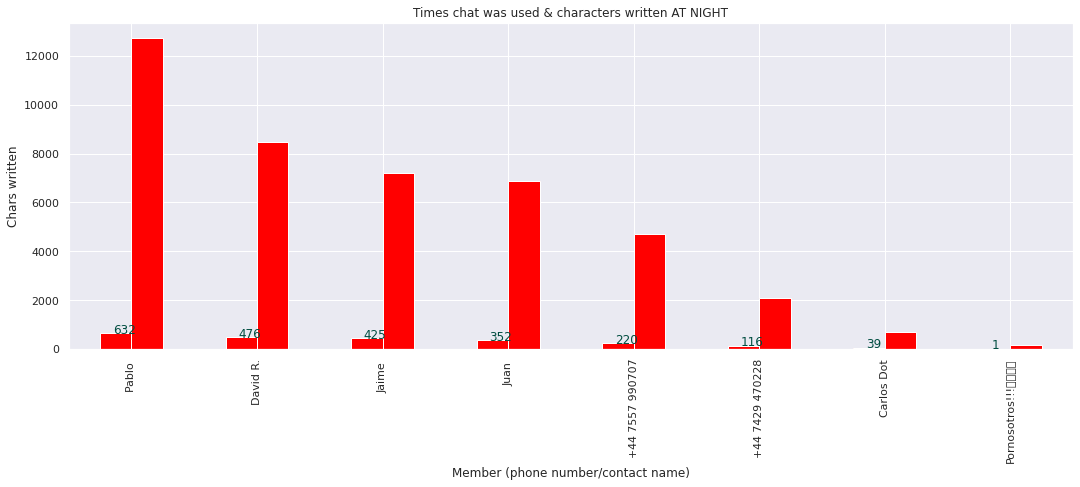

In [ ]:
############### Hecha por mi - sacamos quienes son los que más han trasnochado

###### Mostramos usuarios más trasnochadores (a partir de las 23 horas y hasta las 7 AM)
#  member_chat_info = {"member": [],  "chat_count": [],"chars_count": [], "dia": [],"mes": [], "anio": [], "hora": []}

df_member_info = pd.DataFrame(member_chat_info)
msg_trasnochadores = df_member_info[(df_member_info.hora >= 23) | (df_member_info.hora<=7)]

#### Plot como el anterior pero para saber quien es el más trasnochador
"""
DataFrame de carateres por pibe y núm de veces que acceden al chat
"""
info_member = (msg_trasnochadores
                     .groupby(["member"])
                     .sum()
                     .sort_values(by = ['chat_count'], ascending=False))

"""
Top Member Chars written
"""
print(info_member.head(10)[["chat_count","chars_count"]])
top_users = info_member.head(10)[["chat_count","chars_count"]]
if not top_users.empty:
    sns.set()
    member_plot = top_users.plot(kind='bar', legend=None, title="Times chat was used & characters written AT NIGHT", figsize=(18, 6), color="red")
    member_plot.set_xlabel("Member (phone number/contact name)")
    member_plot.set_ylabel("Chars written")
    
    for i, v in enumerate(top_users["chat_count"]):
        member_plot.text(i - .15, v + 3, v, color="#004d40")
    
else:
    print("This chat has no member")

####### ANÁLISIS
##### Pablo el rey del trasnoche





/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 58645 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 58647 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 57345 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 57348 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 58645 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 58647 missing from current font.
  font.set_te

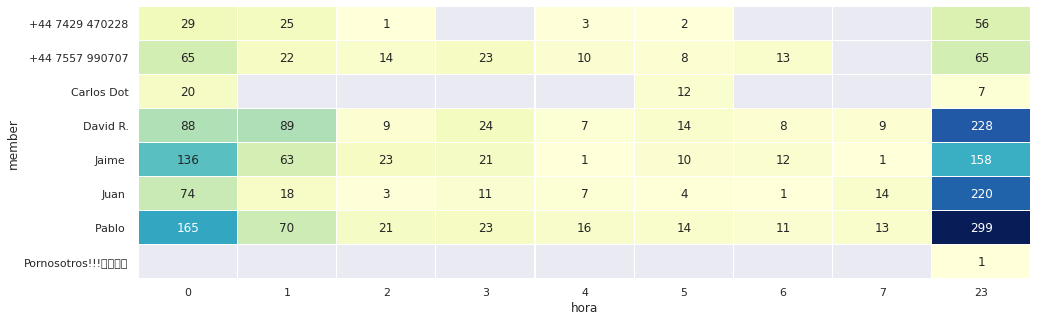

In [ ]:

## Vamos a hacer PUTA MAGIA: heatMap por hora, en el rango de los trasnochadores, para cada usuario

grouped_heatmap = msg_trasnochadores.groupby(["member", "hora"]).sum().sort_values(by=["chat_count"], ascending=False)
pivoted_heatmap = pd.pivot_table(grouped_heatmap, values='chat_count', index=['member'], columns=['hora'])
plt.figure(figsize = (16,5))
sns.heatmap(pivoted_heatmap, 
            annot=True, 
            fmt=".0f", 
            linewidths=.2,
            cmap="YlGnBu",
            cbar=False
            )

#### ANÁLISIS
## Pablo el típico que escribe un montón antes de salir de copas o en durante las copas: a las 23:00-23:59 y a las 00:00-00:59.
## Juan es muy de antes de salir para avisar que llega tarde: 23:00 - 23:59. Luego se centra en ser el alma mater de la fiesta o, en su defecto, de saciar su hambre de REGGAETON

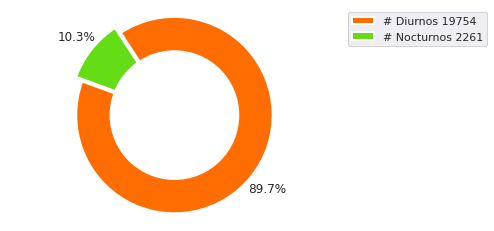

In [ ]:
#### Vamos a pintar un rosco to guapo que contenga la comparativa de cuántos mensajes se han enviado en el rango de trasnoche vs el resto del día

msg_diurnos = df_member_info[~((df_member_info.hora >= 23) | (df_member_info.hora<=7))]


num_msg_diurnos=msg_diurnos.shape[0]
num_msg_trasnochadores=msg_trasnochadores.shape[0]

toPlot=[('# Diurnos',num_msg_diurnos),('# Nocturnos', num_msg_trasnochadores)]

at_labels = [x[0].title() + " " + str(x[1]) for x in toPlot]

at_explode = tuple([0 + i * 0.1 for i in range(len(toPlot))])
at_sizes = [x[1] for x in toPlot]
at_colors = ["#FF6D00", "#64DD17",]
at_pie = plt.pie(at_sizes,  
          autopct='%1.1f%%',
          explode=at_explode,
          pctdistance=1.2,
          colors=at_colors,
          startangle=160,
          radius=1.3,
          wedgeprops = { 'linewidth' : 2, 'edgecolor' : 'white' },
)

at_centre_circle = plt.Circle((0,0),0.85,color='white', fc='white',linewidth=1.25)
at_fig = plt.gcf()
at_fig.gca().add_artist(at_centre_circle)

plt.legend(
    loc='upper left',
    labels=at_labels,
    prop={'size': 11},
    bbox_to_anchor=(1, 1)
)
at_axis = plt.axis('equal')




                 attachment_count
member                           
Pablo                         481
David R.                      318
Jaime                         206
Juan                          200
+44 7429 470228                73
[('Pablo ', 481), ('David R.', 318), ('Jaime ', 206), ('Juan ', 200), ('+44 7429 470228', 73), ('+44 7557 990707', 62), ('Carlos Dot', 14)]


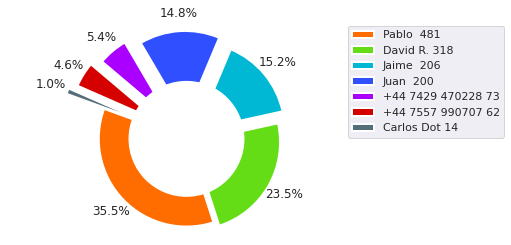

In [ ]:
############### Hecha por mi - Comparar quién envía más attachments. Pero estaría deputamadre que la función que saca qué tipo de attachment es
### devolviese esa info, así podríamos hacer estos plots más bonitos: un rosco por cada tipo de media, por ejemplo (fijo que es to facil pero no he 
### querido meterme en lo que devuelve la función que hace match con las expresiones regulares)

df_attachments=(pd.DataFrame(member_attachment_info)
                     .groupby(["member"])
                     .sum()
                     .sort_values(by = ['attachment_count'], ascending=False))

print(df_attachments.head(5))
### Pasamos de pandas a tuplas
records = df_attachments.to_records(index=True)
### Y eso a una lista de tuplas para poder hacer el rosco to bonito
result = list(records)

print(result)
s_attachments = result

if s_attachments:
    at_labels = [x[0].title() + " " + str(x[1]) for x in s_attachments]

    at_explode = tuple([0 + i * 0.1 for i in range(len(s_attachments))])
    at_sizes = [x[1] for x in s_attachments]
    at_colors = ["#FF6D00", "#64DD17", "#00B8D4", "#304FFE", "#AA00FF", "#d50000", "#546E7A", "#dddddd"]
    at_pie = plt.pie(at_sizes,  
             autopct='%1.1f%%',
             explode=at_explode,
             pctdistance=1.2,
             colors=at_colors,
             startangle=160,
             radius=1.3,
             wedgeprops = { 'linewidth' : 2, 'edgecolor' : 'white' },
    )

    at_centre_circle = plt.Circle((0,0),0.85,color='white', fc='white',linewidth=1.25)
    at_fig = plt.gcf()
    at_fig.gca().add_artist(at_centre_circle)

    plt.legend(
        loc='upper left',
        labels=at_labels,
        prop={'size': 11},
        bbox_to_anchor=(1, 1)
    )
    at_axis = plt.axis('equal')
else:
    print("This chat contains no attachment.")

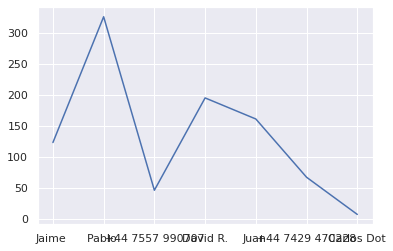

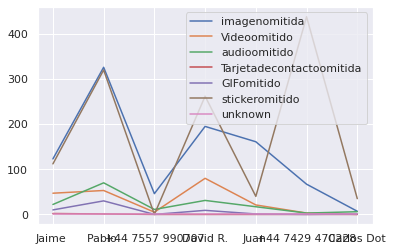

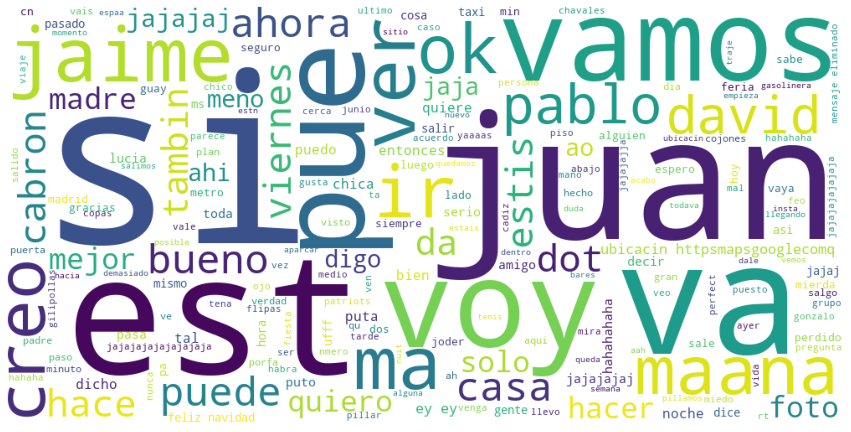

In [ ]:

########### Wordcloud DE PALABRAS DE POR LA NOCHE
chat_Latewords
if chat_Latewords:
    latewordcloud = WordCloud(
        width = 1000, 
        height = 500,
        background_color = "white"
    ).generate(chat_Latewords)

    plt.figure(figsize=(15,8))
    plt.imshow(latewordcloud)
    plt.axis("off")
    plt.show()
else:
    print("This chat contains no word")


#### ANÁLISIS: se ríen mucho, se omiten muchos audios, lo más seguro, se dice 

In [ ]:
################ DE AQUI PARA ABAJO ES CÓDIGO BASE QUE VENÍA

In [ ]:
"""
DataFrame
"""
chat_per_member = (pd.DataFrame(member_chat)
                     .groupby(["member"])
                     .sum()
                     .sort_values(by = ['chat_count'], ascending=False))
popular_words_df = sorted(popular_words.items(), key=operator.itemgetter(1), reverse=True)
domains = (pd.DataFrame(refered_web)
                     .groupby(["domain"])
                     .sum()
                     .sort_values(by = ['d_count'], ascending=False))
emojis_df = (pd.DataFrame(emojis)
                     .groupby(["emj_char"])
                     .sum()
                     .sort_values(by = ['char_count'], ascending=False))
top_repeated_emoji = (pd.DataFrame(emojis)
                     .sort_values(by = ['char_count'], ascending=False))
heatmap_df = pd.DataFrame(heat_map)
grouped_heatmap = heatmap_df.groupby(["day", "hour"]).sum().sort_values(by=["chat_count"], ascending=False)
pivoted_heatmap = pd.pivot_table(grouped_heatmap, values='chat_count', index=['day'], columns=['hour'])

print("Done. You can run next cell.")

Done. You can run next cell.


                    chat_count
member                        
Pablo                     5089
David R.                  4104
Juan                      3871
Jaime                     3032
+44 7429 470228           1744
+44 7557 990707           1531
Carlos Dot                 131
Pornosotros!!!           1


/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 58645 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 58647 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 57345 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 57348 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 58645 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 58647 missing from current font.
  font.set_te

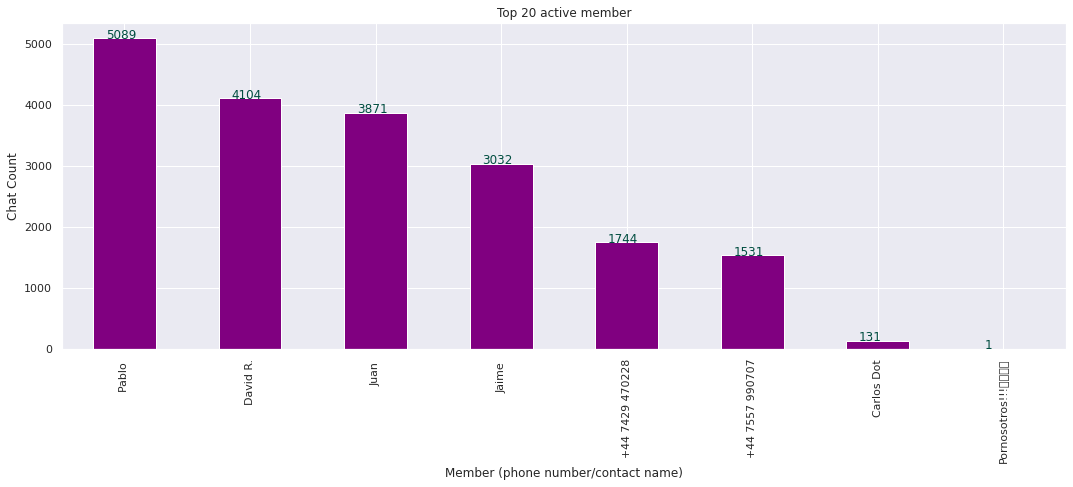

In [ ]:
"""
Top Member Chat
"""
top_member = chat_per_member.head(20)
print(chat_per_member.head(20))
if not top_member.empty:
    sns.set()
    member_plot = top_member.plot(kind='bar', legend=None, title="Top 20 active member", figsize=(18, 6), color="purple")
    member_plot.set_xlabel("Member (phone number/contact name)")
    member_plot.set_ylabel("Chat Count")
    for i, v in enumerate(top_member["chat_count"]):
        member_plot.text(i - .15, v + 3, v, color="#004d40")
else:
    print("This chat has no member")

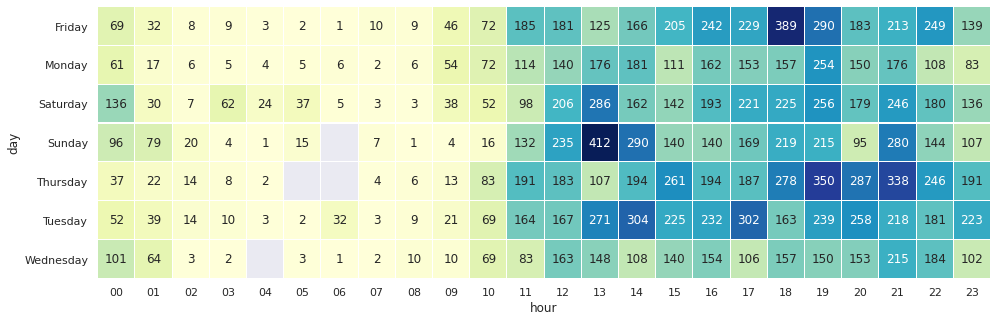

In [ ]:
"""
Heatmap
"""
heatmap_df = pd.DataFrame(heat_map)
if not heatmap_df.empty:
    grouped_heatmap = heatmap_df.groupby(["day", "hour"]).sum().sort_values(by=["chat_count"], ascending=False)
    pivoted_heatmap = pd.pivot_table(grouped_heatmap, values='chat_count', index=['day'], columns=['hour'])
    plt.figure(figsize = (16,5))
    sns.heatmap(pivoted_heatmap, 
                annot=True, 
                fmt=".0f", 
                linewidths=.2,
                cmap="YlGnBu",
                cbar=False
               )
else:
    print("This chat does not contain any datetime")

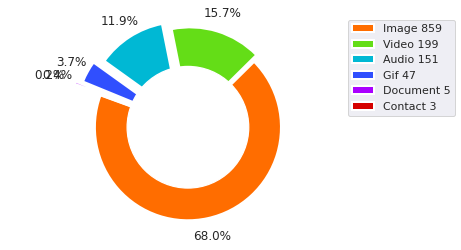

In [ ]:
s_attachments = sorted(attachments.items(), key = operator.itemgetter(1), reverse=True)
if s_attachments:
    at_labels = [x[0].title() + " " + str(x[1]) for x in s_attachments]

    at_explode = tuple([0 + i * 0.1 for i in range(len(s_attachments))])
    at_sizes = [x[1] for x in s_attachments]
    at_colors = ["#FF6D00", "#64DD17", "#00B8D4", "#304FFE", "#AA00FF", "#d50000", "#546E7A", "#dddddd"]
    at_pie = plt.pie(at_sizes,  
             autopct='%1.1f%%',
             explode=at_explode,
             pctdistance=1.2,
             colors=at_colors,
             startangle=160,
             radius=1.3,
             wedgeprops = { 'linewidth' : 2, 'edgecolor' : 'white' },
    )

    at_centre_circle = plt.Circle((0,0),0.85,color='white', fc='white',linewidth=1.25)
    at_fig = plt.gcf()
    at_fig.gca().add_artist(at_centre_circle)

    plt.legend(
        loc='upper left',
        labels=at_labels,
        prop={'size': 11},
        bbox_to_anchor=(1, 1)
    )
    at_axis = plt.axis('equal')
else:
    print("This chat contains no attachment.")

In [ ]:
"""
Top Website
"""
top_web = domains.head(20).sort_values("d_count")
if not top_web.empty:
    mpl.rc('font', **{'sans-serif' : 'arial', 'family' : 'sans-serif'})
    web_plot = top_web.plot(kind='barh', legend=None, title="Top 20 mentioned domain", figsize=(20,10), color="#1de9b6")
    web_plot.set_xlabel("Mention Count")
    for i, v in enumerate(top_web["d_count"]):
        web_plot.text(1, i - .15, v, color="purple")
else:
    print("This chat not contains any link")

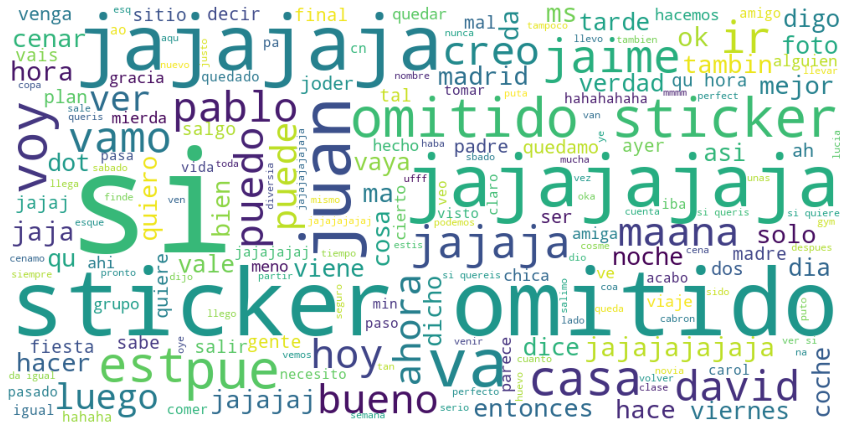

In [ ]:
"""
Wordcloud
"""
if chat_words:
    wordcloud = WordCloud(
        width = 1000, 
        height = 500,
        background_color = "white"
    ).generate(chat_words)

    plt.figure(figsize=(15,8))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()
else:
    print("This chat contains no word")

In [ ]:
"""
Raw Output
"""
print("\n=======================================\n")
print("#Total Chat: {0}".format(total_chat))
print("#Deleted Message: {0}".format(deleted_message))
print("#Total Attachment: {0}".format(sum([x[1] for x in s_attachments])))
for a in s_attachments:
    print("  - : {0}".format(a))
    


print("\n#Top 20 Member")
print("-----------------")
print(top_member)


print("\n#Top 20 Words")
print("-----------------")
for k, v in enumerate(popular_words_df):
    if k < 20:
        print(v)
    else:
        break
        
print("\n#Top 20 Emoji")
print("-----------------")
print(emojis_df.head(20))

print("\n#Top 20 Mentioned Website")
print("-----------------")
print(top_web.sort_values("d_count", ascending=False))



#Total Chat: 19503
#Deleted Message: 0
#Total Attachment: 1264
  - : ('Pablo ', 435)
  - : ('David R.', 303)
  - : ('Jaime ', 198)
  - : ('Juan ', 188)
  - : ('+44 7429 470228', 69)
  - : ('+44 7557 990707', 62)
  - : ('Carlos Dot', 9)

#Top 20 Member
-----------------
                    chat_count
member                        
Pablo                     5089
David R.                  4104
Juan                      3871
Jaime                     3032
+44 7429 470228           1744
+44 7557 990707           1531
Carlos Dot                 131
Pornosotros!!!           1

#Top 20 Words
-----------------
('si', 944)
('sticker', 647)
('omitido', 642)
('q', 421)
('jajajaja', 419)
('jajajajaja', 375)
('juan', 342)
('pues', 320)
('voy', 315)
('casa', 266)
('ir', 257)
('vamos', 251)
('jaime', 234)
('va', 234)
('david', 232)
('hoy', 219)
('jajaja', 218)
('pablo', 213)
('maana', 212)
('est', 211)

#Top 20 Emoji
-----------------
Empty DataFrame
Columns: [char_count]
Index: []

#Top 20 Ment

NameError: ignored

# Visualizaciones (Mis mierdas Dani)

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 58645 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 58647 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 57345 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 57348 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 58645 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 58647 missing from current font.
  font.set_te

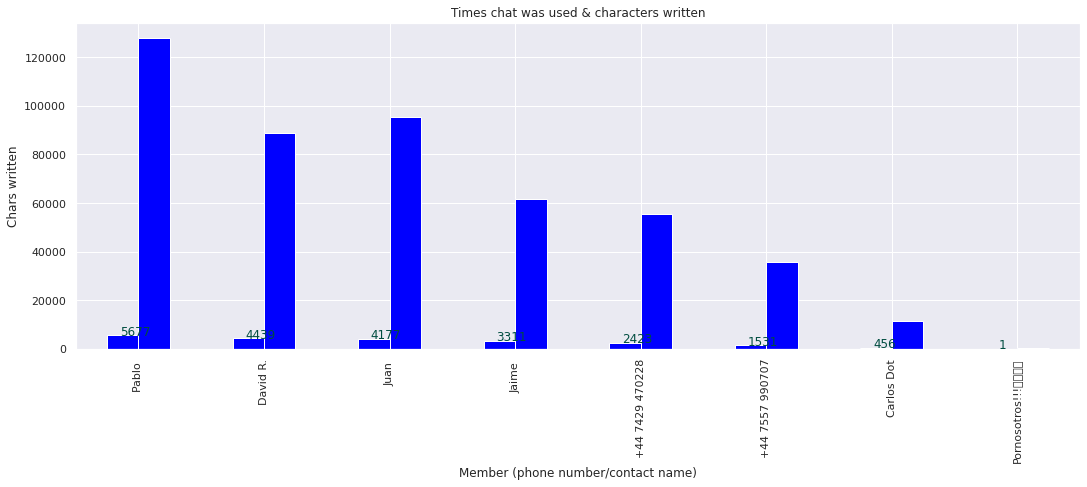

In [ ]:
member_plot = top_users.plot(kind='bar', legend=None, title="Times chat was used & characters written", figsize=(18, 6), color="blue")
member_plot.set_xlabel("Member (phone number/contact name)")
member_plot.set_ylabel("Chars written")
    
for i, v in enumerate(top_users["chat_count"]):
    member_plot.text(i - .15, v + 3, v, color="#004d40")

In [ ]:
grouped_heatmap = msg_trasnochadores.groupby(["member", "hora"]).sum().sort_values(by=["chat_count"], ascending=False)
pivoted_heatmap = pd.pivot_table(grouped_heatmap, values='chat_count', index=['member'], columns=['hora'])
plt.figure(figsize = (16,5))
sns.heatmap(pivoted_heatmap, 
            annot=True, 
            fmt=".0f", 
            linewidths=.2,
            cmap="YlGnBu",
            cbar=False
            )